## Overview

With over 1,200 quick service restaurants across the globe, TFI is the company behind some of the world's most well-known brands: Burger King, Sbarro, Popeyes, Usta Donerci, and Arby’s. They employ over 20,000 people in Europe and Asia and make significant daily investments in developing new restaurant sites.
Right now, deciding when and where to open new restaurants is largely a subjective process based on the personal judgement and experience of development teams. This subjective data is difficult to accurately extrapolate across geographies and cultures.
New restaurant sites take large investments of time and capital to get up and running. When the wrong location for a restaurant brand is chosen, the site closes within 18 months and operating losses are incurred.
Finding a mathematical model to increase the effectiveness of investments in new restaurant sites would allow TFI to invest more in other important business areas, like sustainability, innovation, and training for new employees. Using demographic, real estate, and commercial data, this competition challenges you to predict the annual restaurant sales of 100,000 regional locations.



# Prediction Restaurant revenues using machine learning
This projects aims at predicting the annual restaurant sales of 100,000 regional locations.

## 1. Problem Definition
> How well can we predict the revenues generated in restaurants from 100,000 regional locations?

## 2. Data
This dataset is from the Restaurant Revenue Prediction Kaggle competition. https://www.kaggle.com/competitions/restaurant-revenue-prediction/data

* train.csv - the training set. Use this dataset for training your model. 
* test.csv - the test set. To deter manual "guess" predictions, Kaggle has supplemented the test set with additional "ignored" data. These are not counted in the scoring.
* sampleSubmission.csv - a sample submission file in the correct format

## 3. Evaluation
The evaluation metric is the RMSE (root maen square error) between the original value and predicted value.
https://www.kaggle.com/competitions/restaurant-revenue-prediction/overview/evaluation

## 4. Features
This is where you'll get different information about each features in your data
**Data Dictionary**

Data fields
* Id : Restaurant id. 
* Open Date : opening date for a restaurant
* City : City that the restaurant is in. Note that there are unicode in the names. 
* City Group: Type of the city. Big cities, or Other. 
* Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
* P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
* Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("data/train.csv",
                 parse_dates=["Open Date"])
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [3]:
df["Open Date"]

0     1999-07-17
1     2008-02-14
2     2013-03-09
3     2012-02-02
4     2009-05-09
         ...    
132   2008-06-25
133   2006-10-12
134   2006-07-08
135   2010-10-29
136   2009-09-01
Name: Open Date, Length: 137, dtype: datetime64[ns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Id          137 non-null    int64         
 1   Open Date   137 non-null    datetime64[ns]
 2   City        137 non-null    object        
 3   City Group  137 non-null    object        
 4   Type        137 non-null    object        
 5   P1          137 non-null    int64         
 6   P2          137 non-null    float64       
 7   P3          137 non-null    float64       
 8   P4          137 non-null    float64       
 9   P5          137 non-null    int64         
 10  P6          137 non-null    int64         
 11  P7          137 non-null    int64         
 12  P8          137 non-null    int64         
 13  P9          137 non-null    int64         
 14  P10         137 non-null    int64         
 15  P11         137 non-null    int64         
 16  P12         137 non-null  

## Sort Datafrmae by Open Date

In [5]:
df.sort_values(by=["Open Date"], inplace=True, ascending=True)
df["Open Date"]

35    1996-05-08
122   1997-04-10
28    1998-01-28
112   1998-03-14
64    1998-07-13
         ...    
77    2013-10-25
52    2013-11-12
65    2013-12-21
119   2014-01-03
21    2014-01-25
Name: Open Date, Length: 137, dtype: datetime64[ns]

## Copy of original DataFrame

In [6]:
df_tmp = df.copy()

## Add datetime parameters for ```Open Date``` column

In [7]:
df_tmp["openYear"] = df_tmp["Open Date"].dt.year
df_tmp["openMonth"] = df_tmp["Open Date"].dt.month
df_tmp["openDay"] = df_tmp["Open Date"].dt.day

In [8]:
df_tmp.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,revenue,openYear,openMonth,openDay
35,35,1996-05-08,Adana,Other,IL,4,5.0,4.0,3.0,1,...,3,3,3,4,3,3,3903884.0,1996,5,8
122,122,1997-04-10,İstanbul,Big Cities,IL,12,7.5,6.0,7.5,2,...,25,6,18,3,16,6,4286645.0,1997,4,10
28,28,1998-01-28,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,5,2,3,5,4,4,4705945.0,1998,1,28
112,112,1998-03-14,İstanbul,Big Cities,IL,4,5.0,5.0,4.0,1,...,1,2,2,1,3,3,3784230.0,1998,3,14
64,64,1998-07-13,İstanbul,Big Cities,IL,12,7.5,6.0,6.0,2,...,25,4,24,15,20,6,2551252.0,1998,7,13


In [9]:
# Dropping ```Open Date``` Column
df_tmp.drop("Open Date", axis=1, inplace=True)

In [10]:
df_tmp.head().T

,35,122,28,112,64
Id,35,122,28,112,64
City,Adana,İstanbul,İstanbul,İstanbul,İstanbul
City Group,Other,Big Cities,Big Cities,Big Cities,Big Cities
Type,IL,IL,IL,IL,IL
P1,4,12,4,4,12
P2,5,7.5,5,5,7.5
P3,4,6,4,5,6
P4,3,7.5,4,4,6
P5,1,2,1,1,2
P6,2,8,3,5,8


In [11]:
df_tmp.City.value_counts()

İstanbul          50
Ankara            19
İzmir              9
Samsun             5
Bursa              5
Antalya            4
Sakarya            4
Eskişehir          3
Tekirdağ           3
Kayseri            3
Diyarbakır         3
Adana              3
Trabzon            2
Konya              2
Muğla              2
Aydın              2
Afyonkarahisar     1
Kastamonu          1
Elazığ             1
Uşak               1
Kütahya            1
Tokat              1
Kocaeli            1
Amasya             1
Osmaniye           1
Edirne             1
Şanlıurfa          1
Denizli            1
Balıkesir          1
Kırklareli         1
Gaziantep          1
Karabük            1
Bolu               1
Isparta            1
Name: City, dtype: int64

In [12]:
df_tmp.Type.value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [13]:
df_tmp["City Group"].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [14]:
df.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

## 5. Modelling

In [15]:
df_tmp["revenue"]

35     3903884.0
122    4286645.0
28     4705945.0
112    3784230.0
64     2551252.0
         ...    
77     1904842.0
52     1763231.0
65     1756069.0
119    3780019.0
21     1149870.0
Name: revenue, Length: 137, dtype: float64

In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_tmp.drop("revenue", axis=1), df_tmp["revenue"])

ValueError: could not convert string to float: 'Adana'

In [17]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 35 to 21
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          137 non-null    int64  
 10  P7          137 non-null    int64  
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

## Convert strings to categories

In [18]:
pd.api.types.is_string_dtype(df_tmp["City"])

True

In [19]:
# find the column containing strings
for label, content in df_tmp.items():
    if  pd.api.types.is_string_dtype(content):
        print(label)

City
City Group
Type


In [20]:
# Turn strings to category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [21]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 35 to 21
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Id          137 non-null    int64   
 1   City        137 non-null    category
 2   City Group  137 non-null    category
 3   Type        137 non-null    category
 4   P1          137 non-null    int64   
 5   P2          137 non-null    float64 
 6   P3          137 non-null    float64 
 7   P4          137 non-null    float64 
 8   P5          137 non-null    int64   
 9   P6          137 non-null    int64   
 10  P7          137 non-null    int64   
 11  P8          137 non-null    int64   
 12  P9          137 non-null    int64   
 13  P10         137 non-null    int64   
 14  P11         137 non-null    int64   
 15  P12         137 non-null    int64   
 16  P13         137 non-null    float64 
 17  P14         137 non-null    int64   
 18  P15         137 non-null    int64   
 19  P16     

In [22]:
df_tmp.City.cat.categories

Index(['Adana', 'Afyonkarahisar', 'Amasya', 'Ankara', 'Antalya', 'Aydın',
       'Balıkesir', 'Bolu', 'Bursa', 'Denizli', 'Diyarbakır', 'Edirne',
       'Elazığ', 'Eskişehir', 'Gaziantep', 'Isparta', 'Karabük', 'Kastamonu',
       'Kayseri', 'Kocaeli', 'Konya', 'Kütahya', 'Kırklareli', 'Muğla',
       'Osmaniye', 'Sakarya', 'Samsun', 'Tekirdağ', 'Tokat', 'Trabzon', 'Uşak',
       'İstanbul', 'İzmir', 'Şanlıurfa'],
      dtype='object')

In [23]:
df_tmp.City.cat.codes

35      0
122    31
28     31
112    31
64     31
       ..
77      3
52     30
65     32
119    31
21     31
Length: 137, dtype: int8

In [32]:
df_tmp.Type.dtype

dtype('int8')

All Data is now numeric, we should be able to build the machine learning model now.

In [27]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes

In [28]:
for label, content in df_tmp.items():
    if  pd.api.types.is_string_dtype(content):
        print(label)

In [29]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
City
City Group
Type
P1
P2
P3
P4
P5
P6
P7
P8
P9
P10
P11
P12
P13
P14
P15
P16
P17
P18
P19
P20
P21
P22
P23
P24
P25
P26
P27
P28
P29
P30
P31
P32
P33
P34
P35
P36
P37
revenue
openYear
openMonth
openDay


In [36]:
%%time
#fit the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
model.fit(df_tmp.drop("revenue", axis=1), df_tmp["revenue"])

Wall time: 442 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [33]:
len(df_tmp)

137

In [35]:
#Score the model
model.score(df_tmp.drop("revenue", axis=1), df_tmp["revenue"])

0.854763356425734

## Splitting data into training and validation sets

In [41]:
df_tmp.openYear.value_counts()

2011    25
2012    18
2009    16
2010    15
2008    14
2013    12
2006     7
2007     7
1999     4
2005     4
1998     4
2004     3
2014     2
2000     2
2002     2
1997     1
1996     1
Name: openYear, dtype: int64

In [42]:
df_tmp.openYear

35     1996
122    1997
28     1998
112    1998
64     1998
       ... 
77     2013
52     2013
65     2013
119    2014
21     2014
Name: openYear, Length: 137, dtype: int64

In [47]:
# Split data into training and validation sets
df_val = df_tmp[df_tmp.openYear >= 2012]
df_train = df_tmp[df_tmp.openYear < 2012]
len(df_val), len(df_train)

(32, 105)

In [49]:
# Split data into X & Y
x_train, y_train = df_train.drop("revenue", axis=1), df_train.revenue
x_valid, y_valid = df_val.drop("revenue", axis=1), df_val.revenue

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((105, 44), (105,), (32, 44), (32,))

In [53]:
y_train

35     3903884.0
122    4286645.0
28     4705945.0
112    3784230.0
64     2551252.0
         ...    
74     5500818.0
103    4429512.0
48     7201784.0
25     3778621.0
14     1999097.0
Name: revenue, Length: 105, dtype: float64

## Building an evaluation function

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmse(y_test, y_preds):
    """
    Calculates the root mean squared error between predictions and true labels.
    """
    return np.sqrt(mean_squared_error(y_test, y_preds))

#Create function to evaluate model on different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSE": rmse(y_train, train_preds),
              "Valid RMSE": rmse(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [55]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(x_train, y_train)

Wall time: 415 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [62]:
show_scores(model)

{'Training MAE': 709509.3455238095,
 'Valid MAE': 1949986.6640625,
 'Training RMSE': 1052859.3410072455,
 'Valid RMSE': 2378984.114650658,
 'Training R^2': 0.8478473440466443,
 'Valid R^2': -1.3128859418163406}

## Hyperparameter tuning using RandomizedSearchCV

In [85]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

#Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

Wall time: 1min 30s


C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [86]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_features': 'auto',
 'max_depth': 10}

In [88]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 1598169.9763478353,
 'Valid MAE': 1840642.18670506,
 'Training RMSE': 2461725.067202919,
 'Valid RMSE': 2185100.9780620164,
 'Training R^2': 0.16820189884180092,
 'Valid R^2': -0.951255566590163}

## Model with the best hyperparameters

In [90]:
%%time
ideal_model = RandomForestRegressor(n_estimators=20,
                                    min_samples_split=16,
                                    min_samples_leaf=19,
                                    max_features=1.0,
                                    max_depth=10,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)
ideal_model.fit(x_train, y_train)

Wall time: 88.9 ms


RandomForestRegressor(max_depth=10, min_samples_leaf=19, min_samples_split=16,
                      n_estimators=20, n_jobs=-1, random_state=42)

In [91]:
show_scores(ideal_model)

{'Training MAE': 1598169.9763478353,
 'Valid MAE': 1840642.1867050603,
 'Training RMSE': 2461725.067202919,
 'Valid RMSE': 2185100.9780620164,
 'Training R^2': 0.16820189884180092,
 'Valid R^2': -0.951255566590163}

In [92]:
show_scores(rs_model)

{'Training MAE': 1598169.9763478353,
 'Valid MAE': 1840642.1867050603,
 'Training RMSE': 2461725.067202919,
 'Valid RMSE': 2185100.9780620164,
 'Training R^2': 0.16820189884180092,
 'Valid R^2': -0.9512555665901634}

In [93]:
show_scores(model)

{'Training MAE': 709509.3455238095,
 'Valid MAE': 1949986.6640625,
 'Training RMSE': 1052859.3410072455,
 'Valid RMSE': 2378984.114650658,
 'Training R^2': 0.8478473440466443,
 'Valid R^2': -1.3128859418163406}

In [138]:
show_scores(gbmodel)

{'Training MAE': 262581.731484983,
 'Valid MAE': 1724844.64612761,
 'Training RMSE': 347817.1273445986,
 'Valid RMSE': 2110187.5399452853,
 'Training R^2': 0.9833949282545528,
 'Valid R^2': -0.8197563387943105}

In [142]:
show_scores(xgbmodel)

{'Training MAE': 2.7130952380952382,
 'Valid MAE': 1733691.796875,
 'Training RMSE': 4.435835536261676,
 'Valid RMSE': 2196613.616102576,
 'Training R^2': 0.9999999999972993,
 'Valid R^2': -0.9718708860379812}

## Predictions on test data

In [71]:
df_test =  pd.read_csv("data/test.csv",
                       parse_dates=["Open Date"])
df_test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Id          100000 non-null  int64         
 1   Open Date   100000 non-null  datetime64[ns]
 2   City        100000 non-null  object        
 3   City Group  100000 non-null  object        
 4   Type        100000 non-null  object        
 5   P1          100000 non-null  int64         
 6   P2          100000 non-null  float64       
 7   P3          100000 non-null  float64       
 8   P4          100000 non-null  float64       
 9   P5          100000 non-null  int64         
 10  P6          100000 non-null  int64         
 11  P7          100000 non-null  int64         
 12  P8          100000 non-null  int64         
 13  P9          100000 non-null  int64         
 14  P10         100000 non-null  int64         
 15  P11         100000 non-null  int64         
 16  P12

## Preprocessing data

In [72]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df
    """
    df.sort_values(by=["Open Date"], inplace=True, ascending=True)
    df["Open Date"]

    df["openYear"] = df["Open Date"].dt.year
    df["openMonth"] = df["Open Date"].dt.month
    df["openDay"] = df["Open Date"].dt.day

    df.drop("Open Date", axis=1, inplace=True)
    
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()

        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes
    
    return df

In [73]:
#Process test data
df_test =  preprocess_data(df_test)
df_test.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P31,P32,P33,P34,P35,P36,P37,openYear,openMonth,openDay
16457,16457,3,0,2,4,5.0,3.0,3.0,1,2,...,0,0,0,4,0,0,0,1995,5,8
93003,93003,25,1,2,2,5.0,4.0,4.0,1,5,...,0,2,0,0,0,0,0,1995,5,8
70787,70787,54,0,2,4,5.0,4.0,3.0,1,5,...,1,4,1,1,12,4,1,1995,5,8
50778,50778,54,0,2,4,5.0,5.0,3.0,1,5,...,1,5,1,1,5,5,1,1995,5,8
32290,32290,36,1,1,2,5.0,4.0,3.0,2,3,...,1,0,1,1,0,3,0,1995,5,8


In [67]:
x_train.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P31,P32,P33,P34,P35,P36,P37,openYear,openMonth,openDay
35,35,0,1,2,4,5.0,4.0,3.0,1,2,...,1,3,3,3,4,3,3,1996,5,8
122,122,31,0,2,12,7.5,6.0,7.5,2,8,...,15,25,6,18,3,16,6,1997,4,10
28,28,31,0,2,4,5.0,4.0,4.0,1,3,...,5,5,2,3,5,4,4,1998,1,28
112,112,31,0,2,4,5.0,5.0,4.0,1,5,...,2,1,2,2,1,3,3,1998,3,14
64,64,31,0,2,12,7.5,6.0,6.0,2,8,...,15,25,4,24,15,20,6,1998,7,13


In [74]:
# Make predictions on the test data
test_preds = model.predict(df_test)
test_preds

array([5294291.27, 4260211.92, 5933735.06, ..., 4402799.33, 4441533.75,
       4432297.96])

In [94]:
test_preds = ideal_model.predict(df_test)
test_preds

array([4092254.51416583, 3992733.99009244, 5664037.33248286, ...,
       3861223.02627315, 3801738.77529276, 3992733.99009244])

In [96]:
# Format predictions to Kaggle submission format
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["Prediction"] = test_preds
df_preds

,Id,Prediction
16457,16457,4.092255e+06
93003,93003,3.992734e+06
70787,70787,5.664037e+06
50778,50778,5.664037e+06
32290,32290,5.604553e+06
...,...,...
82137,82137,4.092255e+06
36261,36261,5.664037e+06
83703,83703,3.861223e+06
12350,12350,3.801739e+06


In [97]:
df_preds.to_csv("data/test_predictions.csv")

## Feature Improtance

Seeks to find the most important attribute in predicting the target variable

In [114]:
ideal_model.feature_importances_

array([0.04869146, 0.72931923, 0.        , 0.        , 0.00989281,
       0.1       , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05      , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05688031, 0.00521618])

In [99]:
len(ideal_model.feature_importances_)

44

In [117]:
def plot_features(columns, importances, n=10):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importances")
    ax.invert_yaxis()

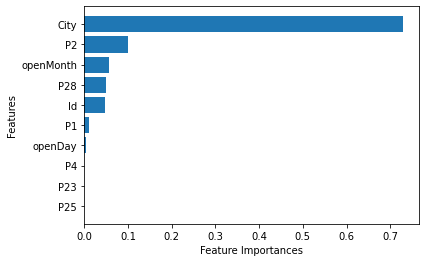

In [118]:
plot_features(x_train.columns, ideal_model.feature_importances_)

In [124]:
x_train["City"].value_counts()

31    40
3     15
32     6
8      5
25     4
0      3
18     3
13     3
5      2
4      2
20     2
10     2
26     2
27     2
29     2
1      1
7      1
9      1
33     1
11     1
12     1
14     1
16     1
17     1
23     1
24     1
15     1
Name: City, dtype: int64

In [131]:
# install xgboost in terminal
# conda install -c conda-forge xgboost

In [129]:
import xgboost
print(xgboost.__version__)

1.5.0


In [130]:
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True)
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X, y, scoring='neg_mean_squared_error')
(-scores)**0.5

array([62.80101886, 65.78389959, 62.21211593, 66.40836809, 67.3001013 ])

In [136]:
%%time
from sklearn.ensemble import GradientBoostingRegressor


gbmodel = GradientBoostingRegressor(random_state=42)

gbmodel.fit(x_train, y_train)

Wall time: 412 ms


GradientBoostingRegressor(random_state=42)

In [137]:
show_scores(gbmodel)

{'Training MAE': 262581.731484983,
 'Valid MAE': 1724844.64612761,
 'Training RMSE': 347817.1273445986,
 'Valid RMSE': 2110187.5399452853,
 'Training R^2': 0.9833949282545528,
 'Valid R^2': -0.8197563387943105}

In [140]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
xgbmodel = XGBRegressor(random_state=42)
xgbmodel.fit(x_train, y_train)
# scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X, y, scoring='neg_mean_squared_error')
# (-scores)**0.5

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
show_scores(xgbmodel)

{'Training MAE': 2.7130952380952382,
 'Valid MAE': 1733691.796875,
 'Training RMSE': 4.435835536261676,
 'Valid RMSE': 2196613.616102576,
 'Training R^2': 0.9999999999972993,
 'Valid R^2': -0.9718708860379812}